In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'binance_futures.csv'  # Update this path if needed
binance_futures_df = pd.read_csv(file_path, header=[0, 1])

# Drop any fully empty columns or rows
binance_futures_df.dropna(how='all', axis=1, inplace=True)  # Drop fully empty columns
binance_futures_df.dropna(how='all', axis=0, inplace=True)  # Drop fully empty rows

# Descriptive statistics for key metrics
descriptive_stats = binance_futures_df.describe(include=[float])
print("Descriptive Statistics of Binance Futures Data:")
descriptive_stats


Descriptive Statistics of Binance Futures Data:


BTC/USDT:USDT                                                          \
               open          high           low         close        volume   
count   1095.000000   1095.000000   1095.000000   1095.000000  1.095000e+03   
mean   38846.431443  39663.517023  37986.371059  38853.456402  3.931572e+05   
std    16825.753224  17179.746658  16428.366571  16836.346013  2.493766e+05   
min    15772.900000  16304.300000  15443.200000  15773.000000  5.094306e+04   
25%    24659.650000  25318.800000  24164.700000  24659.700000  2.267386e+05   
50%    35069.700000  35981.900000  34303.700000  35069.700000  3.297404e+05   
75%    54789.185000  57451.625000  53548.250000  54789.185000  4.903808e+05   
max    73127.600000  73881.400000  71388.100000  73127.600000  2.065606e+06   

                    ETH/USDT:USDT                                         ...  \
       quote_volume          open         high          low        close  ...   
count  1.095000e+03   1095.000000  1095.000000  1095.000000  1095.000000  ...   
mean   1.349773e+10   2332.425187  2390.500128  2266.733151  2330.974237  ...   
std    7.479087e+09    875.026787   896.669232   844.614266   873.354482  ...   
min    1.320591e+09    994.090000  1078.980000   878.040000   994.090000  ...   
25%    8.625168e+09   1641.910000  1669.970000  1609.225000  1641.905000  ...   
50%    1.238811e+10   2046.070000  2090.790000  1976.000000  2046.080000  ...   
75%    1.679006e+10   2987.060000  3059.070000  2907.160000  2985.415000  ...   
max    6.923100e+10   4814.130000  4877.540000  4714.830000  4814.300000  ...   

      STORJ/USDT:USDT                                           \
                  low        close        volume  quote_volume   
count     1095.000000  1095.000000  1.095000e+03  1.095000e+03   
mean         0.606802     0.638804  1.263106e+08  7.193758e+07   
std          0.400982     0.428769  2.816832e+08  1.586638e+08   
min          0.190500     0.221100  8.404667e+06  3.461962e+06   
25%          0.347350     0.361900  2.816107e+07  1.470004e+07   
50%          0.455300     0.485400  4.641393e+07  2.667794e+07   
75%          0.696200     0.726950  1.060859e+08  6.415727e+07   
max          2.725400     2.952600  5.015864e+09  2.455804e+09   

      THETA/USDT:USDT                                                       \
                 open         high          low        close        volume   
count     1095.000000  1095.000000  1095.000000  1095.000000  1.095000e+03   
mean         1.744691     1.819104     1.660688     1.739378  3.957259e+07   
std          1.404524     1.476195     1.316933     1.395473  3.394670e+07   
min          0.564700     0.585500     0.561000     0.564700  6.251854e+06   
25%          0.957550     0.984150     0.913800     0.957650  2.015677e+07   
50%          1.186000     1.227000     1.134000     1.186000  3.073146e+07   
75%          2.103450     2.199300     2.013100     2.092750  4.789631e+07   
max          8.217000     8.615000     7.730000     8.219000  5.168460e+08   

                     
       quote_volume  
count  1.095000e+03  
mean   6.742604e+07  
std    8.177905e+07  
min    4.599126e+06  
25%    2.260868e+07  
50%    4.018593e+07  
75%    8.129975e+07  
max    9.616436e+08  

[8 rows x 240 columns]

In [31]:

# Flatten multi-level column names for easier processing
binance_futures_df.columns = ['_'.join(col).strip() for col in binance_futures_df.columns]

# Filter for columns containing 'quote_volume' to calculate average quote volumes per symbol
quote_volume_cols = [col for col in binance_futures_df.columns if 'quote_volume' in col]

# Calculate the mean quote volume for each symbol
quote_volume_means = binance_futures_df[quote_volume_cols].mean()
quote_volume_means = quote_volume_means.reset_index()
quote_volume_means.columns = ['Symbol', 'Average Quote Volume']


In [32]:
print("\nAverage Quote Volume per Symbol:")
quote_volume_means['Symbol'] = quote_volume_means['Symbol'].str.replace('/USDT:USDT_quote_volume', '')
quote_volume_means.set_index('Symbol', inplace=True)
quote_volume_means.sort_values('Average Quote Volume', ascending=False, inplace=True)


Average Quote Volume per Symbol:


<Axes: title={'center': 'Average Quote Volume per Symbol'}, xlabel='Symbol', ylabel='Average Quote Volume'>

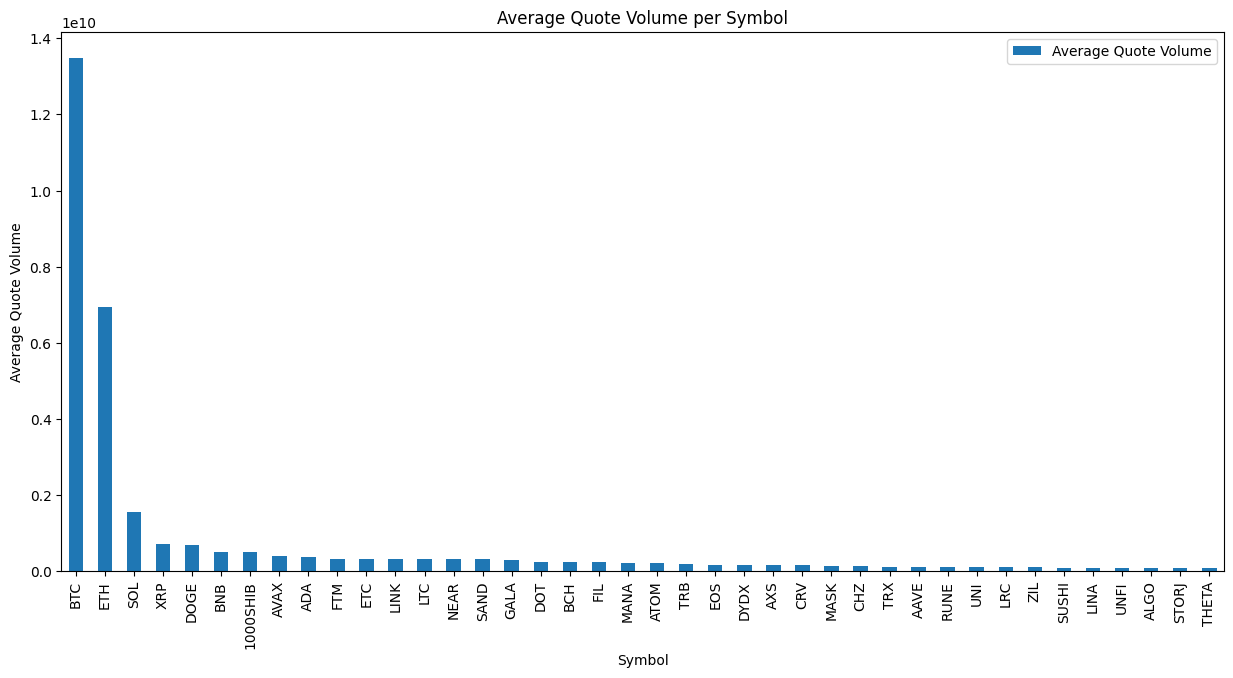

In [33]:
quote_volume_means.plot(kind='bar', title='Average Quote Volume per Symbol', ylabel='Average Quote Volume', xlabel='Symbol', figsize=(15, 7))

In [36]:
quote_volume_means_percent = quote_volume_means / quote_volume_means.sum() * 100

quote_volume_means_percent.round(2)

,Average Quote Volume
Symbol,
BTC,44.27
ETH,22.74
SOL,5.12
XRP,2.31
DOGE,2.21
BNB,1.63
1000SHIB,1.58
AVAX,1.31
ADA,1.21
